   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

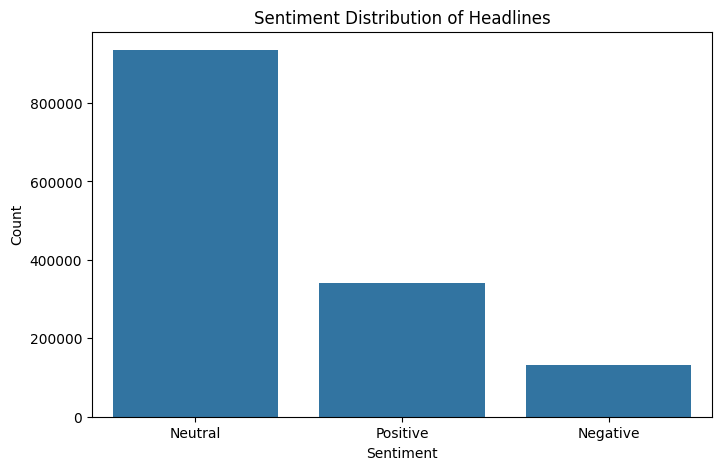

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Tsebaot/nltk_data'
    - 'c:\\Users\\Tsebaot\\Desktop\\week 1\\financial-news-prediction-analysis\\venv\\nltk_data'
    - 'c:\\Users\\Tsebaot\\Desktop\\week 1\\financial-news-prediction-analysis\\venv\\share\\nltk_data'
    - 'c:\\Users\\Tsebaot\\Desktop\\week 1\\financial-news-prediction-analysis\\venv\\lib\\nltk_data'
    - 'C:\\Users\\Tsebaot\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [3]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk import ngrams

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('C:\\Users\\Tsebaot\\Desktop\\week 1\\financial-news-prediction-analysis\\data\\raw_analyst_ratings.csv')

# Display the first few rows of the dataframe
print(df.head())


# Function to categorize sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to headlines
df['sentiment'] = df['headline'].apply(get_sentiment)

# Display sentiment counts
sentiment_counts = df['sentiment'].value_counts()
print("\nSentiment Counts:")
print(sentiment_counts)

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Vectorize the headlines
# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to process headlines
def process_headlines(headlines):
    tokens = []
    for headline in headlines:
        words = word_tokenize(headline.lower())  # Tokenize and convert to lower case
        filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
        tokens.extend(filtered_words)
    return tokens

# Process the headlines
all_tokens = process_headlines(df['headline'])

# Count the frequency of each token
token_counts = Counter(all_tokens)

# Display the most common keywords
common_keywords = token_counts.most_common(20)
print("\nMost Common Keywords:")
for keyword, count in common_keywords:
    print(f"{keyword}: {count}")

# Plotting the most common keywords
keywords, counts = zip(*common_keywords)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(keywords), y=list(counts))
plt.title('Most Common Keywords in Headlines')
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Create bigrams
bigrams = ngrams(all_tokens, 2)
bigram_counts = Counter(bigrams)

# Display the most common bigrams
common_bigrams = bigram_counts.most_common(10)
print("\nMost Common Bigrams:")
for bigram, count in common_bigrams:
    print(f"{' '.join(bigram)}: {count}")

# Plotting the most common bigrams
bigram_words, bigram_counts = zip(*common_bigrams)
bigram_labels = [' '.join(bigram) for bigram in bigram_words]
plt.figure(figsize=(12, 6))
sns.barplot(x=list(bigram_labels), y=list(bigram_counts))
plt.title('Most Common Bigrams in Headlines')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
